# **PNG Dissection**

The notebook allows to perform various operations on PNG files including:
1. Viewing all critical as well as certain ancillary image chunks.
2. Anonymization of a given PNG file with saving the resulting image.

## Loading needed libraries

In [77]:
from png import png_image
from IPython.display import Image, display

## Loading PNG file
Choose an input file from sample images placed in ./imgs folder.

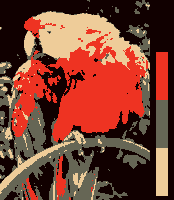

In [78]:
input_file = "imgs/parrot_plte.png"
image = Image(filename=input_file, width=200, height=200)
display(image)

## Displaying critical chunks

Found chunks: ['IHDR', 'PLTE', 'IDAT', 'IEND', 'cHRM', 'gAMA', 'iCCP', 'sBIT', 'sRGB', 'bKGD', 'hIST', 'tRNS', 'pHYs', 'sPLT', 'tIME', 'iTXt', 'tEXt', 'zTXt']

Critical chunks:
----IHDR----
width : 174
height : 200
bit_depth : 2
colour_type : 3
compression_method : 0
filter_method : 0
interlace_method : 0

----PLTE----
Red: 17, Green: 0, Blue: 0
Red: 102, Green: 102, Blue: 85
Red: 238, Green: 204, Blue: 153
Red: 238, Green: 51, Blue: 34

----IDAT----


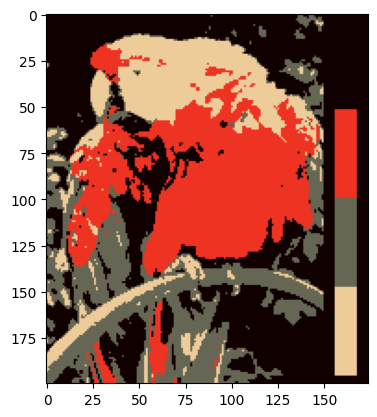


----IEND----
Chunk IEND was read correctly


In [79]:
png_file = png_image.PNG(input_file)
png_file.process_chunks()

chunks = [k for k in png_file.chunks]
print(f"Found chunks: {chunks}")

print("\nCritical chunks:")
print("----IHDR----")
png_file.display_chunk("IHDR")
print("\n----PLTE----")
png_file.display_chunk("PLTE")
print("\n----IDAT----")
png_file.display_chunk("IDAT")
print("\n----IEND----")
png_file.display_chunk("IEND")

## Performing image anonymization

In [80]:
# TODO: load image chunks, save critical ones, save as a new file, compare images before and after the process